<h3><b>ABOUT DATASET</b></h3>

The dataset contains a subset of locations and attributes of incidents reported in the ASAP (Analytical Services Application) crime report database by the District of Columbia Metropolitan Police Department (MPD). Visit crimecards.dc.gov for more information. This data is shared via an automated process where addresses are geocoded to the District's Master Address Repository and assigned to the appropriate street block. Block locations for some crime points could not be automatically assigned resulting in 0,0 for x,y coordinates. These can be interactively assigned using the MAR Geocoder.On February 1 2020, the methodology of geography assignments of crime data was modified to increase accuracy. From January 1 2020 going forward, all crime data will have Ward, ANC, SMD, BID, Neighborhood Cluster, Voting Precinct, Block Group and Census Tract values calculated prior to, rather than after, anonymization to the block level. This change impacts approximately one percent of Ward assignments.

Data source: https://catalog.data.gov/dataset/crime-incidents-in-2025

<h7><b>DATASET</b></h7>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_parquet('CRIME_DATA_FINAL.parquet')    
df

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,LONGITUDE,START_DATE,END_DATE,OBJECTID,DATE(REPORT),DATE(START),DATE(END),TIME(REPORT),TIME(START),TIME(END)
0,400046.41,137753.65,25017503,2025-02-05 19:50:58+00:00,DAY,OTHERS,MOTOR VEHICLE THEFT,400 - 499 BLOCK OF MORSE STREET NE,400046.41,137753.65,...,-76.999465,2025-02-05 19:22:00+00:00,2025-02-05 19:25:00+00:00,685784661,2025-02-05,2025-02-05,2025-02-05,0 days 19:50:58,0 days 19:22:00,0 days 19:25:00
1,397868.68,141140.38,25013087,2025-01-28 12:08:29+00:00,DAY,OTHERS,THEFT/OTHER,3800 - 3899 BLOCK OF GEORGIA AVENUE NW,397868.68,141140.38,...,-77.024583,2025-01-28 11:06:00+00:00,2025-01-28 11:07:00+00:00,685784675,2025-01-28,2025-01-28,2025-01-28,0 days 12:08:29,0 days 11:06:00,0 days 11:07:00
2,399489.48,137372.65,25012701,2025-01-27 17:28:06+00:00,DAY,OTHERS,ROBBERY,1100 - 1150 BLOCK OF 1ST STREET NE,399489.48,137372.65,...,-77.005886,2025-01-27 15:00:00+00:00,2025-01-27 15:20:00+00:00,685784796,2025-01-27,2025-01-27,2025-01-27,0 days 17:28:06,0 days 15:00:00,0 days 15:20:00
3,401498.97,138734.57,25008887,2025-01-19 19:59:51+00:00,DAY,OTHERS,THEFT/OTHER,1500 - 1599 BLOCK OF NEW YORK AVENUE NE,401498.97,138734.57,...,-76.982716,2025-01-19 19:22:00+00:00,2025-01-19 19:32:00+00:00,685784829,2025-01-19,2025-01-19,2025-01-19,0 days 19:59:51,0 days 19:22:00,0 days 19:32:00
4,400212.85,137949.33,25011684,2025-01-25 15:45:47+00:00,DAY,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 5TH STREET NE,400212.85,137949.33,...,-76.997546,2025-01-24 00:00:00+00:00,2025-01-24 03:30:00+00:00,685784830,2025-01-25,2025-01-24,2025-01-24,0 days 15:45:47,0 days 00:00:00,0 days 03:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,398179.82,142930.07,25021662,2025-02-14 01:58:11+00:00,EVENING,OTHERS,THEFT/OTHER,500 - 699 BLOCK OF INGRAHAM STREET NW,398179.82,142930.07,...,-77.020999,2025-02-13 17:41:00+00:00,2025-02-13 17:42:00+00:00,686349313,2025-02-14,2025-02-13,2025-02-13,0 days 01:58:11,0 days 17:41:00,0 days 17:42:00
4160,400096.83,137623.29,25026515,2025-02-23 21:11:33+00:00,EVENING,OTHERS,THEFT F/AUTO,500 - 599 BLOCK OF FLORIDA AVENUE NE,400096.83,137623.29,...,-76.998884,2025-02-23 20:20:00+00:00,2025-02-23 20:40:00+00:00,686349430,2025-02-23,2025-02-23,2025-02-23,0 days 21:11:33,0 days 20:20:00,0 days 20:40:00
4161,398546.76,138840.05,25021363,2025-02-14 16:51:07+00:00,DAY,OTHERS,THEFT/OTHER,300 - 399 BLOCK OF ELM STREET NW,398546.76,138840.05,...,-77.016757,2025-02-13 16:55:00+00:00,2025-02-13 17:08:00+00:00,686349507,2025-02-14,2025-02-13,2025-02-13,0 days 16:51:07,0 days 16:55:00,0 days 17:08:00
4162,397113.59,139035.62,25023768,2025-02-18 13:32:32+00:00,DAY,OTHERS,MOTOR VEHICLE THEFT,1400 - 1499 BLOCK OF W STREET NW,397113.59,139035.62,...,-77.033284,2025-02-18 03:00:00+00:00,2025-02-18 12:20:00+00:00,686349508,2025-02-18,2025-02-18,2025-02-18,0 days 13:32:32,0 days 03:00:00,0 days 12:20:00


<h7><b>TOTAL CASE JANUARY - MARCH 2025 (RECORDED)</b></h7>

Agregate All

In [43]:
crime_counts = df.groupby(df['DATE(START)'].dt.to_period('M')).size().reset_index(name='count')
crime_counts

,DATE(START),count
0,2024-08,2
1,2024-09,3
2,2024-10,4
3,2024-11,15
4,2024-12,130
5,2025-01,2002
6,2025-02,1840
7,2025-03,163


Dataset (2025)

In [3]:
data = df[df['DATE(START)'].dt.year == 2025]
data.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,LONGITUDE,START_DATE,END_DATE,OBJECTID,DATE(REPORT),DATE(START),DATE(END),TIME(REPORT),TIME(START),TIME(END)
0,400046.41,137753.65,25017503,2025-02-05 19:50:58+00:00,DAY,OTHERS,MOTOR VEHICLE THEFT,400 - 499 BLOCK OF MORSE STREET NE,400046.41,137753.65,...,-76.999465,2025-02-05 19:22:00+00:00,2025-02-05 19:25:00+00:00,685784661,2025-02-05,2025-02-05,2025-02-05,0 days 19:50:58,0 days 19:22:00,0 days 19:25:00
1,397868.68,141140.38,25013087,2025-01-28 12:08:29+00:00,DAY,OTHERS,THEFT/OTHER,3800 - 3899 BLOCK OF GEORGIA AVENUE NW,397868.68,141140.38,...,-77.024583,2025-01-28 11:06:00+00:00,2025-01-28 11:07:00+00:00,685784675,2025-01-28,2025-01-28,2025-01-28,0 days 12:08:29,0 days 11:06:00,0 days 11:07:00
2,399489.48,137372.65,25012701,2025-01-27 17:28:06+00:00,DAY,OTHERS,ROBBERY,1100 - 1150 BLOCK OF 1ST STREET NE,399489.48,137372.65,...,-77.005886,2025-01-27 15:00:00+00:00,2025-01-27 15:20:00+00:00,685784796,2025-01-27,2025-01-27,2025-01-27,0 days 17:28:06,0 days 15:00:00,0 days 15:20:00
3,401498.97,138734.57,25008887,2025-01-19 19:59:51+00:00,DAY,OTHERS,THEFT/OTHER,1500 - 1599 BLOCK OF NEW YORK AVENUE NE,401498.97,138734.57,...,-76.982716,2025-01-19 19:22:00+00:00,2025-01-19 19:32:00+00:00,685784829,2025-01-19,2025-01-19,2025-01-19,0 days 19:59:51,0 days 19:22:00,0 days 19:32:00
4,400212.85,137949.33,25011684,2025-01-25 15:45:47+00:00,DAY,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 5TH STREET NE,400212.85,137949.33,...,-76.997546,2025-01-24 00:00:00+00:00,2025-01-24 03:30:00+00:00,685784830,2025-01-25,2025-01-24,2025-01-24,0 days 15:45:47,0 days 00:00:00,0 days 03:30:00


Agregate (2025)

In [45]:
crime_2025 = data.groupby(data['DATE(START)'].dt.to_period('M')).size().reset_index(name='count')
month = ['January', 'February','March']
crime_2025.insert(1, 'Month', month)
crime_2025

,DATE(START),Month,count
0,2025-01,January,2002
1,2025-02,February,1840
2,2025-03,March,163


<h7><b>Crime Patterns in Early 2025</b></h7>

March

In [46]:
march_2025 = data[(data['DATE(START)'].dt.year == 2025) & (data['DATE(START)'].dt.month == 3)]
earliest_date_march = march_2025['DATE(START)'].min()   
last_date_march = march_2025['DATE(START)'].max()
print("Early day recorded on March 2025:", earliest_date_march)
print("Last day recorded on March 2025:", last_date_march)


Early day recorded on March 2025: 2025-03-01 00:00:00
Last day recorded on March 2025: 2025-03-04 00:00:00


February

In [47]:
feb_2025 = data[(data['DATE(START)'].dt.year == 2025) & (data['DATE(START)'].dt.month == 2)]
earliest_date_feb = feb_2025['DATE(START)'].min()   
last_date_feb = feb_2025['DATE(START)'].max()
print("Early day recorded on February 2025:", earliest_date_feb)
print("Last day recorded on February 2025:", last_date_feb)

Early day recorded on February 2025: 2025-02-01 00:00:00
Last day recorded on February 2025: 2025-02-28 00:00:00


January

In [48]:
jan_2025 = data[(data['DATE(START)'].dt.year == 2025) & (data['DATE(START)'].dt.month == 1)]
earliest_date_jan = jan_2025['DATE(START)'].min()   
last_date_jan = jan_2025['DATE(START)'].max()
print("Early day recorded on January 2025:", earliest_date_jan)
print("Last day recorded on January 2025:", last_date_jan)

Early day recorded on January 2025: 2025-01-01 00:00:00
Last day recorded on January 2025: 2025-01-31 00:00:00


In [49]:
total_case = len(data)
print("Total number of cases in 2025 (Jan 1 - Mar 4, 2025):", total_case, "Cases")

Total number of cases in 2025 (Jan 1 - Mar 4, 2025): 4005 Cases


Trend 

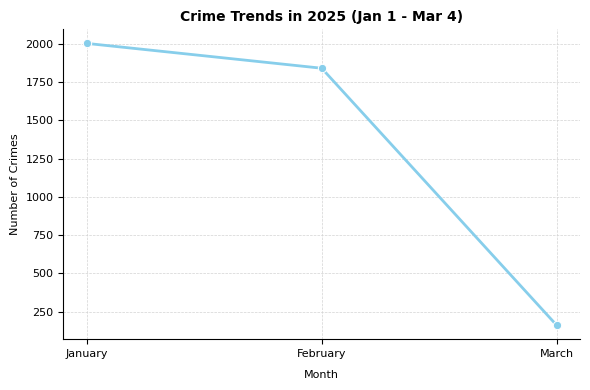

In [50]:
month_order = ['January', 'February', 'March']
plt.figure(figsize=(6, 4), dpi=100) 
sns.lineplot(x=crime_2025['Month'], y=crime_2025['count'], marker='o', color='skyblue', sort=False, linewidth=2, markersize=6)  

plt.title('Crime Trends in 2025 (Jan 1 - Mar 4)', fontweight='bold', color='black', fontsize=10)  
plt.xlabel('Month', labelpad=8, color='black', fontsize=8) 
plt.ylabel('Number of Crimes', color='black', fontsize=8) 
plt.xticks(ticks=range(len(month_order)), labels=month_order, color='black', fontsize=8)  
plt.yticks(color='black', fontsize=8) 

plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5)  

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  

plt.tight_layout()
plt.show()

Recordered


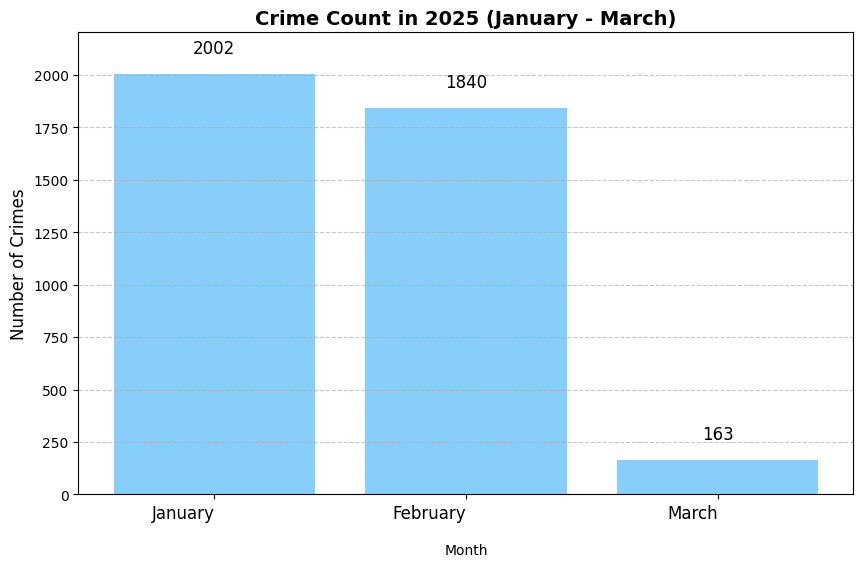

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

bars = plt.bar(crime_2025['Month'], crime_2025['count'], color='lightskyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100,  
             str(yval), ha='center', fontsize=12, fontweight='normal')

plt.title('Crime Count in 2025 (January - March)', fontsize=14, fontweight='bold')
plt.xlabel('Month', labelpad=15)
plt.ylabel('Number of Crimes', fontsize=12)

plt.xticks(ticks=range(len(crime_2025['Month'])), labels=crime_2025['Month'], fontsize=12, ha='right')

plt.ylim(0, crime_2025['count'].max() + 200)  

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Crime occured in 4 days early in (January and February)

In [52]:
jan_feb_march_data = data[((data['DATE(START)'].dt.year == 2025) & (data['DATE(START)'].dt.month.isin([1, 2, 3])))]
first_four_days = jan_feb_march_data[jan_feb_march_data['DATE(START)'].dt.day <= 4]
monthly_counts = first_four_days.groupby(first_four_days['DATE(START)'].dt.month).size().reset_index(name='Count')

month_names = {1: 'January', 2: 'February', 3: 'March'}
monthly_counts['Month'] = monthly_counts['DATE(START)'].map(month_names)

print("Number of cases in the first 4 days of January, February, and March 2025:")
print(monthly_counts)

Number of cases in the first 4 days of January, February, and March 2025:
   DATE(START)  Count     Month
0            1    272   January
1            2    269  February
2            3    163     March


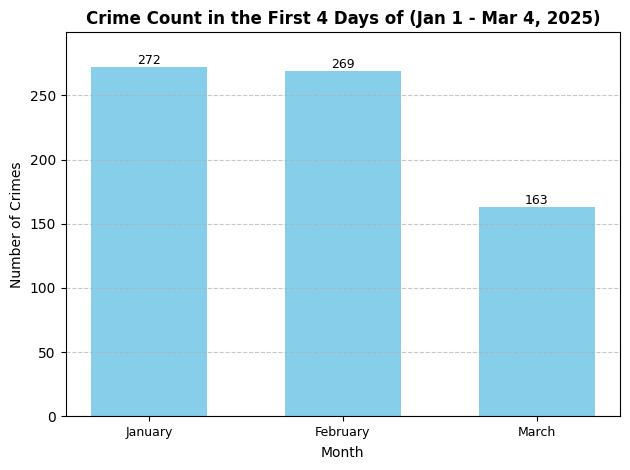

In [53]:
bars = plt.bar(monthly_counts['Month'], monthly_counts['Count'], color='skyblue', width=0.6)  

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             str(int(yval)), ha='center', va='bottom', fontsize=9)  

plt.xlabel('Month', fontsize=10, labelpad=5)  
plt.ylabel('Number of Crimes', fontsize=10)
plt.title('Crime Count in the First 4 Days of (Jan 1 - Mar 4, 2025)', fontsize=12, fontweight='bold') 

plt.xticks(fontsize=9)  

plt.ylim(0, monthly_counts['Count'].max() * 1.1)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Crime rate 

In [54]:
import calendar
import pandas as pd

def days_in_month(year, month):
    return calendar.monthrange(year, month)[1]

crime_2025['days_in_month'] = crime_2025.apply(lambda row: days_in_month(row['DATE(START)'].year, row['DATE(START)'].month) if row['DATE(START)'].month != 3 else 4, axis=1)
crime_2025['crime rate (per day)'] = crime_2025['count'] / crime_2025['days_in_month']
crime_2025

,DATE(START),Month,count,days_in_month,crime rate (per day)
0,2025-01,January,2002,31,64.580645
1,2025-02,February,1840,28,65.714286
2,2025-03,March,163,4,40.750000


Crime by time of day 

C:\Users\LOQ\AppData\Local\Temp\ipykernel_4016\4105225873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE'] = pd.to_datetime(data['START_DATE'])
C:\Users\LOQ\AppData\Local\Temp\ipykernel_4016\4105225873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = data['START_DATE'].dt.hour
C:\Users\LOQ\AppData\Local\Temp\ipykernel_4016\4105225873.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

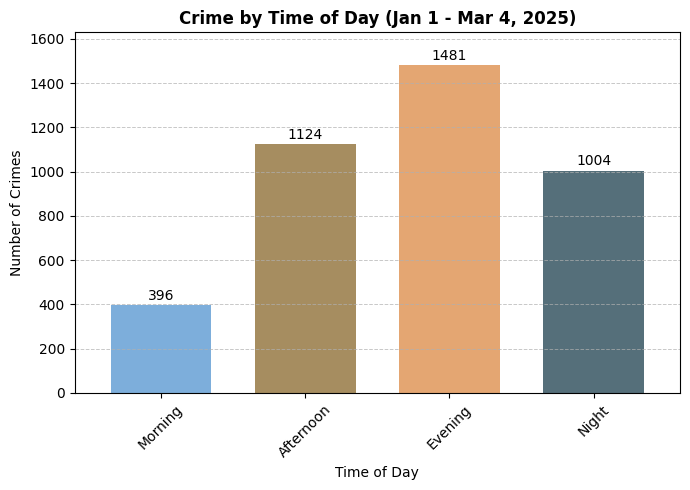

In [55]:
# Convert 'START_DATE' to datetime objects
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['Hour'] = data['START_DATE'].dt.hour

# Function to categorize time of day
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    elif 0 <= hour < 6:
        return 'Night'
    else:
        return 'Invalid date'

data['Time Category'] = data['Hour'].apply(categorize_time)

# Define the desired order of time categories
time_category_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Use Categorical type to enforce the order
data['Time Category'] = pd.Categorical(data['Time Category'], categories=time_category_order, ordered=True)

crime_by_time = data['Time Category'].value_counts().sort_index()

# Define custom colors based on relevance
colors = ['#7DAEDB', '#A68D60', '#E4A672', '#556F7A']

plt.figure(figsize=(7, 5))
ax = crime_by_time.plot(kind='bar', color=colors, width=0.7)

plt.title('Crime by Time of Day (Jan 1 - Mar 4, 2025)', fontsize=12, fontweight='bold')
plt.xlabel('Time of Day', fontsize=10)
plt.ylabel('Number of Crimes', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Set y-limit to make space for labels
plt.ylim(0, crime_by_time.max() * 1.1)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 10),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



Crimes rate by times of day in 3 period of month

C:\Users\LOQ\AppData\Local\Temp\ipykernel_12680\4044374993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE'] = pd.to_datetime(data['START_DATE'])
C:\Users\LOQ\AppData\Local\Temp\ipykernel_12680\4044374993.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['Hour'] = period_data['START_DATE'].dt.hour
C:\Users\LOQ\AppData\Local\Temp\ipykernel_12680\4044374993.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

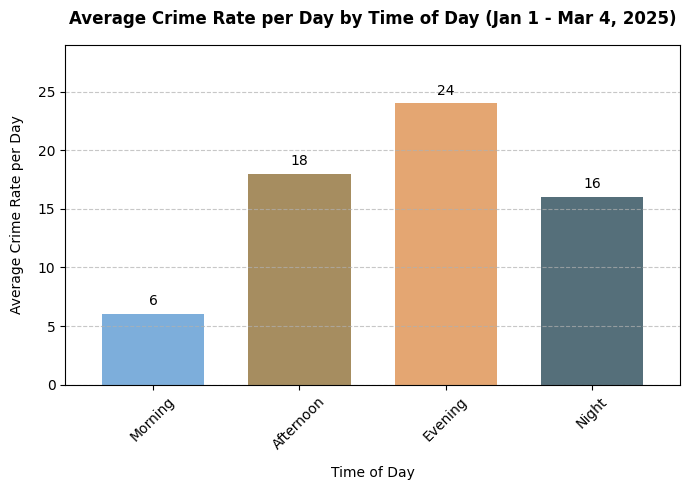

In [6]:
# Convert 'START_DATE' to datetime objects
data['START_DATE'] = pd.to_datetime(data['START_DATE'])

# Filter data for the period 2025-01-01 to 2025-03-04
start_date = '2025-01-01'
end_date = '2025-03-04'
period_data = data[(data['START_DATE'] >= start_date) & (data['START_DATE'] <= end_date)]

# Extract the hour from the 'START_DATE' column
period_data['Hour'] = period_data['START_DATE'].dt.hour

# Define time categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    elif 0 <= hour < 6:
        return 'Night'
    else:
        return 'Night'

# Apply the categorization function to create a new 'Time Category' column
period_data['Time Category'] = period_data['Hour'].apply(categorize_time)

# Count total number of crimes in each time category
crime_by_time = period_data['Time Category'].value_counts()

# Total days in the observed period
total_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

# Calculate average crime rate per day for each time category
crime_rate_by_time = (crime_by_time / total_days).round()

# Define the desired order of time categories
time_category_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Convert the crime rate dictionary to a Pandas Series with the specified order
crime_rate_series = crime_rate_by_time.reindex(time_category_order)

# Define colors to match the previous charts
colors = ['#7DAEDB', '#A68D60', '#E4A672', '#556F7A']

# Create a bar chart
plt.figure(figsize=(7, 5))
ax = crime_rate_series.plot(kind='bar', color=colors, width=0.7)

# Adjust spacing between bars and box frame
plt.gca().set_ylim(0, crime_rate_series.max() + 5)

plt.title('Average Crime Rate per Day by Time of Day (Jan 1 - Mar 4, 2025)', fontweight='bold', pad=15)
plt.xlabel('Time of Day', labelpad=10)
plt.ylabel('Average Crime Rate per Day', labelpad=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


Crime Trends by Crime Type

In [57]:
data['OFFENSE'].unique()

['MOTOR VEHICLE THEFT', 'THEFT/OTHER', 'ROBBERY', 'THEFT F/AUTO', 'BURGLARY', 'HOMICIDE', 'ASSAULT W/DANGEROUS WEAPON', 'SEX ABUSE', 'ARSON']
Categories (9, object): ['ARSON', 'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE', ..., 'ROBBERY', 'SEX ABUSE', 'THEFT F/AUTO', 'THEFT/OTHER']

In [58]:
count_crime_types = data['OFFENSE'].value_counts()
number_of_crime_types = pd.DataFrame(count_crime_types).reset_index()
number_of_crime_types

,OFFENSE,count
0,THEFT/OTHER,1654
1,THEFT F/AUTO,918
2,MOTOR VEHICLE THEFT,839
3,ROBBERY,282
4,BURGLARY,150
5,ASSAULT W/DANGEROUS WEAPON,123
6,HOMICIDE,24
7,SEX ABUSE,13
8,ARSON,2


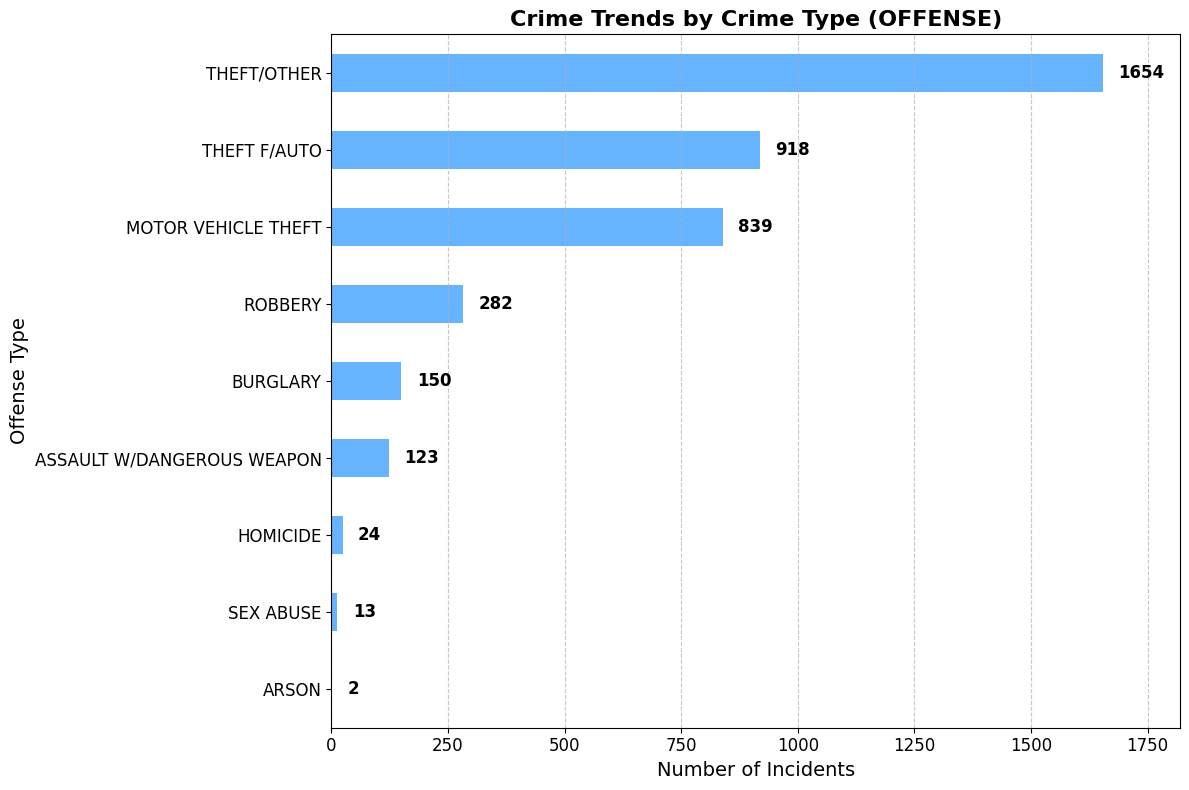

In [59]:
# Calculate the frequency of each crime type
crime_type_counts = data['OFFENSE'].value_counts()

# Sort in ascending order for better visualization
crime_type_counts = crime_type_counts.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))  
ax = crime_type_counts.plot(kind='barh', color='#66b3ff')

# Add labels and title
plt.title('Crime Trends by Crime Type (OFFENSE)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Incidents', fontsize=14)
plt.ylabel('Offense Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations to the bars
for p in ax.patches:
    width = p.get_width()
    position = width + max(crime_type_counts) * 0.02  
    plt.text(position, p.get_y() + p.get_height() / 2, f'{int(width)}',
             ha='left', va='center', fontsize=12, fontweight='bold', color='black')

plt.xlim(0, max(crime_type_counts) * 1.1)  

# Adjust layout for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_4016\783174968.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


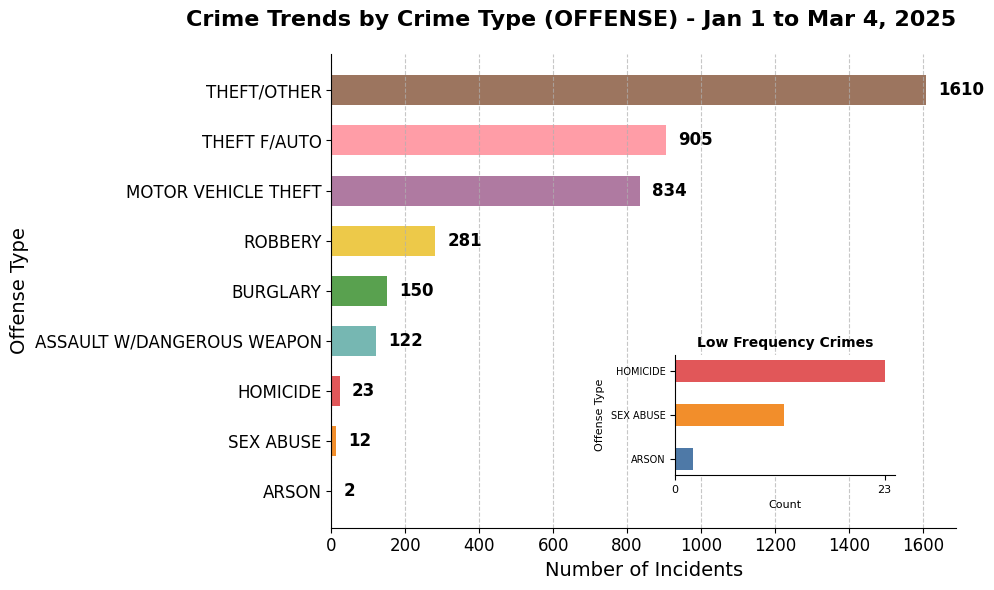

In [82]:
# THEFT/OTHER →  #9c755f
# THEFT F/AUTO → #ff9da7
# MOTOR VEHICLE THEFT → #af7aa1
# ROBBERY → #edc949
# BURGLARY → #59a14f
# ASSAULT W/DANGEROUS WEAPON → #76b7b2
# OMICIDE → #e15759
# SEX ABUSE → #f28e2b
# ARSON → #4e79a7

# Calculate the frequency of each crime type
crime_type_counts = data['OFFENSE'].value_counts()

# Sort in ascending order for better visualization
crime_type_counts = crime_type_counts.sort_values(ascending=True)

# Define colors matching the PPT theme
colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F"]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))  
bars = ax.barh(crime_type_counts.index, crime_type_counts.values, color=colors[:len(crime_type_counts)], height=0.6)

# Add labels and title
ax.set_title('Crime Trends by Crime Type (OFFENSE) - Jan 1 to Mar 4, 2025', fontsize=16, fontweight='bold', loc='right', pad=20)
ax.set_xlabel('Number of Incidents', fontsize=14)
ax.set_ylabel('Offense Type', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations to the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + max(crime_type_counts) * 0.02, bar.get_y() + bar.get_height()/2, f'{int(width)}',
            ha='left', va='center', fontsize=12, fontweight='bold', color='black')

# Inset Plot for highlighting small data points
small_crimes = crime_type_counts[crime_type_counts <= 30]
if not small_crimes.empty:
    ax_inset = fig.add_axes([0.68, 0.20, 0.22, 0.2])  # Adjusted positioning and size
    inset_colors = [colors[list(crime_type_counts.index).index(crime)] for crime in small_crimes.index]  # Match colors
    ax_inset.barh(small_crimes.index, small_crimes.values, color=inset_colors, height=0.5)
    ax_inset.set_title("Low Frequency Crimes", fontsize=10, fontweight='bold')
    ax_inset.set_xlabel("Count", fontsize=8)
    ax_inset.set_ylabel("Offense Type", fontsize=8)
    ax_inset.tick_params(axis='x', labelsize=8)
    ax_inset.tick_params(axis='y', labelsize=7)
    ax_inset.set_xticks([0, max(small_crimes)])  # Adjust x-axis ticks for clarity
    ax_inset.spines['top'].set_visible(False)
    ax_inset.spines['right'].set_visible(False)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


Crime duration in hour

In [61]:
data.head(4)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,END_DATE,OBJECTID,DATE(REPORT),DATE(START),DATE(END),TIME(REPORT),TIME(START),TIME(END),Hour,Time Category
0,400046.41,137753.65,25017503,2025-02-05 19:50:58+00:00,DAY,OTHERS,MOTOR VEHICLE THEFT,400 - 499 BLOCK OF MORSE STREET NE,400046.41,137753.65,...,2025-02-05 19:25:00+00:00,685784661,2025-02-05,2025-02-05,2025-02-05,0 days 19:50:58,0 days 19:22:00,0 days 19:25:00,19,Evening
1,397868.68,141140.38,25013087,2025-01-28 12:08:29+00:00,DAY,OTHERS,THEFT/OTHER,3800 - 3899 BLOCK OF GEORGIA AVENUE NW,397868.68,141140.38,...,2025-01-28 11:07:00+00:00,685784675,2025-01-28,2025-01-28,2025-01-28,0 days 12:08:29,0 days 11:06:00,0 days 11:07:00,11,Morning
2,399489.48,137372.65,25012701,2025-01-27 17:28:06+00:00,DAY,OTHERS,ROBBERY,1100 - 1150 BLOCK OF 1ST STREET NE,399489.48,137372.65,...,2025-01-27 15:20:00+00:00,685784796,2025-01-27,2025-01-27,2025-01-27,0 days 17:28:06,0 days 15:00:00,0 days 15:20:00,15,Afternoon
3,401498.97,138734.57,25008887,2025-01-19 19:59:51+00:00,DAY,OTHERS,THEFT/OTHER,1500 - 1599 BLOCK OF NEW YORK AVENUE NE,401498.97,138734.57,...,2025-01-19 19:32:00+00:00,685784829,2025-01-19,2025-01-19,2025-01-19,0 days 19:59:51,0 days 19:22:00,0 days 19:32:00,19,Evening


In [62]:
data['TIME(DURATION)'] = data['TIME(END)'] - data['TIME(START)']

C:\Users\LOQ\AppData\Local\Temp\ipykernel_4016\1564368491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TIME(DURATION)'] = data['TIME(END)'] - data['TIME(START)']


In [63]:
data.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,OBJECTID,DATE(REPORT),DATE(START),DATE(END),TIME(REPORT),TIME(START),TIME(END),Hour,Time Category,TIME(DURATION)
0,400046.41,137753.65,25017503,2025-02-05 19:50:58+00:00,DAY,OTHERS,MOTOR VEHICLE THEFT,400 - 499 BLOCK OF MORSE STREET NE,400046.41,137753.65,...,685784661,2025-02-05,2025-02-05,2025-02-05,0 days 19:50:58,0 days 19:22:00,0 days 19:25:00,19,Evening,0 days 00:03:00
1,397868.68,141140.38,25013087,2025-01-28 12:08:29+00:00,DAY,OTHERS,THEFT/OTHER,3800 - 3899 BLOCK OF GEORGIA AVENUE NW,397868.68,141140.38,...,685784675,2025-01-28,2025-01-28,2025-01-28,0 days 12:08:29,0 days 11:06:00,0 days 11:07:00,11,Morning,0 days 00:01:00
2,399489.48,137372.65,25012701,2025-01-27 17:28:06+00:00,DAY,OTHERS,ROBBERY,1100 - 1150 BLOCK OF 1ST STREET NE,399489.48,137372.65,...,685784796,2025-01-27,2025-01-27,2025-01-27,0 days 17:28:06,0 days 15:00:00,0 days 15:20:00,15,Afternoon,0 days 00:20:00
3,401498.97,138734.57,25008887,2025-01-19 19:59:51+00:00,DAY,OTHERS,THEFT/OTHER,1500 - 1599 BLOCK OF NEW YORK AVENUE NE,401498.97,138734.57,...,685784829,2025-01-19,2025-01-19,2025-01-19,0 days 19:59:51,0 days 19:22:00,0 days 19:32:00,19,Evening,0 days 00:10:00
4,400212.85,137949.33,25011684,2025-01-25 15:45:47+00:00,DAY,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 5TH STREET NE,400212.85,137949.33,...,685784830,2025-01-25,2025-01-24,2025-01-24,0 days 15:45:47,0 days 00:00:00,0 days 03:30:00,0,Night,0 days 03:30:00


In [64]:
data['TIME(DURATION)'] = data['TIME(DURATION)'].abs()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_4016\2634076748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TIME(DURATION)'] = data['TIME(DURATION)'].abs()


In [65]:
data.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,OBJECTID,DATE(REPORT),DATE(START),DATE(END),TIME(REPORT),TIME(START),TIME(END),Hour,Time Category,TIME(DURATION)
0,400046.41,137753.65,25017503,2025-02-05 19:50:58+00:00,DAY,OTHERS,MOTOR VEHICLE THEFT,400 - 499 BLOCK OF MORSE STREET NE,400046.41,137753.65,...,685784661,2025-02-05,2025-02-05,2025-02-05,0 days 19:50:58,0 days 19:22:00,0 days 19:25:00,19,Evening,0 days 00:03:00
1,397868.68,141140.38,25013087,2025-01-28 12:08:29+00:00,DAY,OTHERS,THEFT/OTHER,3800 - 3899 BLOCK OF GEORGIA AVENUE NW,397868.68,141140.38,...,685784675,2025-01-28,2025-01-28,2025-01-28,0 days 12:08:29,0 days 11:06:00,0 days 11:07:00,11,Morning,0 days 00:01:00
2,399489.48,137372.65,25012701,2025-01-27 17:28:06+00:00,DAY,OTHERS,ROBBERY,1100 - 1150 BLOCK OF 1ST STREET NE,399489.48,137372.65,...,685784796,2025-01-27,2025-01-27,2025-01-27,0 days 17:28:06,0 days 15:00:00,0 days 15:20:00,15,Afternoon,0 days 00:20:00
3,401498.97,138734.57,25008887,2025-01-19 19:59:51+00:00,DAY,OTHERS,THEFT/OTHER,1500 - 1599 BLOCK OF NEW YORK AVENUE NE,401498.97,138734.57,...,685784829,2025-01-19,2025-01-19,2025-01-19,0 days 19:59:51,0 days 19:22:00,0 days 19:32:00,19,Evening,0 days 00:10:00
4,400212.85,137949.33,25011684,2025-01-25 15:45:47+00:00,DAY,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 5TH STREET NE,400212.85,137949.33,...,685784830,2025-01-25,2025-01-24,2025-01-24,0 days 15:45:47,0 days 00:00:00,0 days 03:30:00,0,Night,0 days 03:30:00


In [66]:
data['TIME(DURATION)'].describe()

count                         4005
mean     0 days 04:09:38.082397003
std      0 days 06:25:05.175372396
min                0 days 00:00:00
25%                0 days 00:21:00
50%                0 days 01:00:00
75%                0 days 04:29:00
max                0 days 23:57:00
Name: TIME(DURATION), dtype: object

C:\Users\LOQ\AppData\Local\Temp\ipykernel_4016\4019223779.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration = filtered_data.groupby("OFFENSE")["TIME(DURATION)"].mean().sort_values()


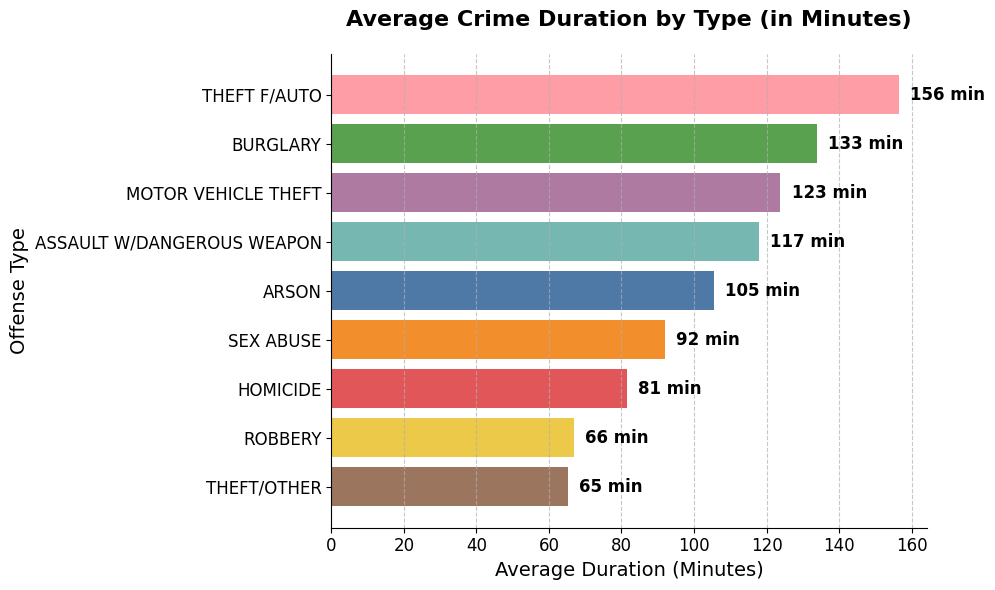

In [83]:
# Convert TIME(DURATION) to timedelta format
data["TIME(DURATION)"] = pd.to_timedelta(data["TIME(DURATION)"])

# Remove rows with default date (00:00:00) or invalid durations
data = data[data["TIME(DURATION)"] > pd.Timedelta(seconds=0)]

# Remove outliers using IQR method
Q1 = data["TIME(DURATION)"].quantile(0.25)
Q3 = data["TIME(DURATION)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data["TIME(DURATION)"] >= lower_bound) & (data["TIME(DURATION)"] <= upper_bound)]

# Calculate average duration per offense
avg_duration = filtered_data.groupby("OFFENSE")["TIME(DURATION)"].mean().sort_values()

# Convert to minutes for better readability
avg_duration = avg_duration.dt.total_seconds() / 60  # Convert seconds to minutes

# Define colors matching the specified mapping
offense_colors = {
    "THEFT/OTHER": "#9c755f",
    "THEFT F/AUTO": "#ff9da7",
    "MOTOR VEHICLE THEFT": "#af7aa1",
    "ROBBERY": "#edc949",
    "BURGLARY": "#59a14f",
    "ASSAULT W/DANGEROUS WEAPON": "#76b7b2",
    "HOMICIDE": "#e15759",
    "SEX ABUSE": "#f28e2b",
    "ARSON": "#4e79a7"
}

# Assign colors based on OFFENSE categories
colors = [offense_colors[offense] for offense in avg_duration.index]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))  
bars = ax.barh(avg_duration.index, avg_duration.values, color=colors)

# Add labels and title
ax.set_title('Average Crime Duration by Type (in Minutes)', fontsize=16, fontweight='bold', loc='center', pad=20)
ax.set_xlabel('Average Duration (Minutes)', fontsize=14)
ax.set_ylabel('Offense Type', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations to the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + max(avg_duration) * 0.02, bar.get_y() + bar.get_height()/2, f'{int(width)} min',
            ha='left', va='center', fontsize=12, fontweight='bold', color='black')

# Adjust layout for better readability
plt.tight_layout()
plt.show()



<h7><b>CRIME DISTRIBUTION AND HOTSPOT</b></h7>

Geospatial Mapping

In [17]:
import geopandas as gpd

# Load GeoJSON file
wards_gdf = gpd.read_file("Crime_Incidents_in_2025.geojson")

# Print 
print(wards_gdf.columns)


Index(['CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK', 'XBLOCK',
       'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHOOD_CLUSTER',
       'BLOCK_GROUP', 'CENSUS_TRACT', 'VOTING_PRECINCT', 'LATITUDE',
       'LONGITUDE', 'BID', 'START_DATE', 'END_DATE', 'OBJECTID',
       'OCTO_RECORD_ID', 'geometry'],
      dtype='object')


C:\Users\LOQ\AppData\Local\Temp\ipykernel_13532\3365139810.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wards_gdf["WARD"].fillna(most_common_ward, inplace=True)


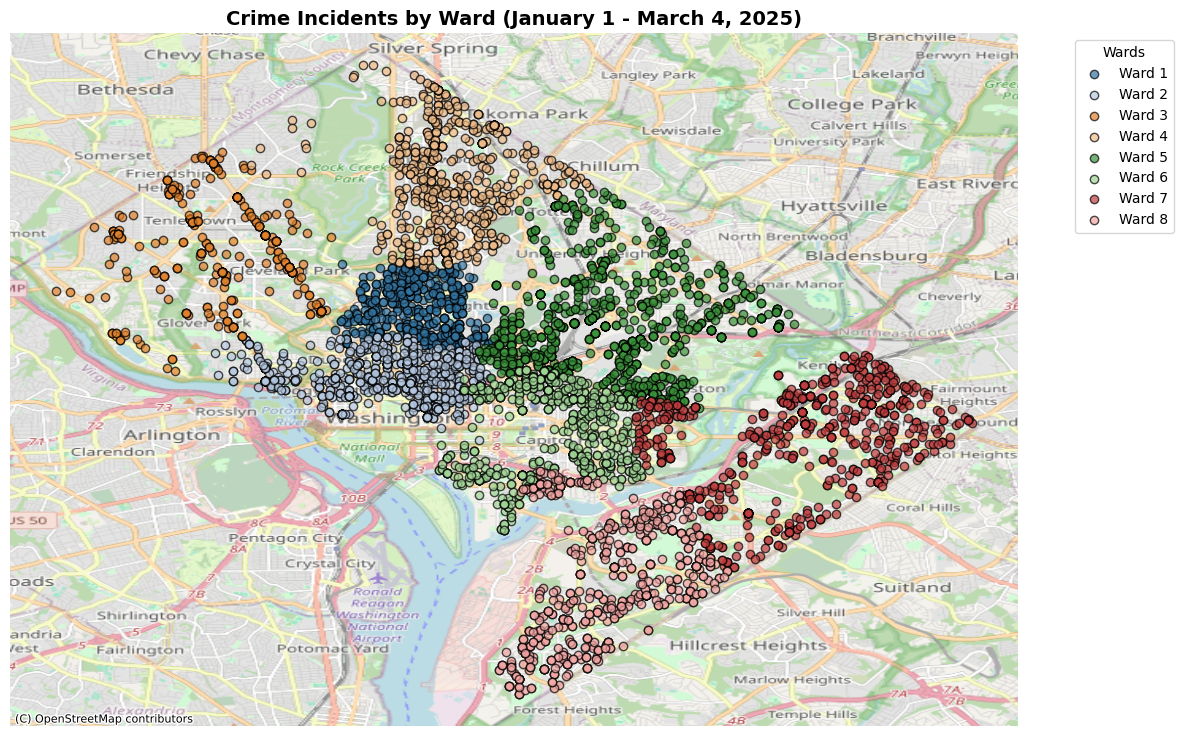

In [17]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Load GeoJSON file
wards_gdf = gpd.read_file("Crime_Incidents_in_2025.geojson")

# Fill missing WARD values with the most common ward
most_common_ward = wards_gdf["WARD"].mode()[0]
wards_gdf["WARD"].fillna(most_common_ward, inplace=True)
wards_gdf["WARD"] = wards_gdf["WARD"].astype(int)

# Convert to the correct coordinate system (Web Mercator for basemap compatibility)
wards_gdf = wards_gdf.to_crs(epsg=3857)

# Define colors for each ward
ward_colors = {
    1: "#3274a1", 
    2: "#b5c8e1",
    3: "#e1812c",
    4: "#eebb89",
    5: "#3a923a",
    6: "#9fd495",
    7: "#c03d3e",
    8: "#f2a5a3"
}

# Create the plot with wider dimensions
fig, ax = plt.subplots(figsize=(13, 9))  # Wider but not too tall

# Plot each ward with its respective color
for ward, color in ward_colors.items():
    subset = wards_gdf[wards_gdf["WARD"] == ward]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor="black", label=f"Ward {ward}", alpha=0.7)

# Adjust aspect ratio
ax.set_aspect("auto")  # Allows the width to expand without forcing height

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.8)

# Formatting
plt.title("Crime Incidents by Ward (January 1 - March 4, 2025)", fontsize=14, fontweight="bold")
plt.legend(title="Wards", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.axis("off")  # Remove axis for better visualization

# Show plot
plt.show()


Location Insight

In [18]:
ward_count = data['WARD'].value_counts().sort_index()
ward_count_total = pd.DataFrame(ward_count)
ward_count_total

,count
WARD,
1,535
2,573
3,286
4,470
5,813
6,479
7,461
8,388


C:\Users\LOQ\AppData\Local\Temp\ipykernel_15192\3780307139.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


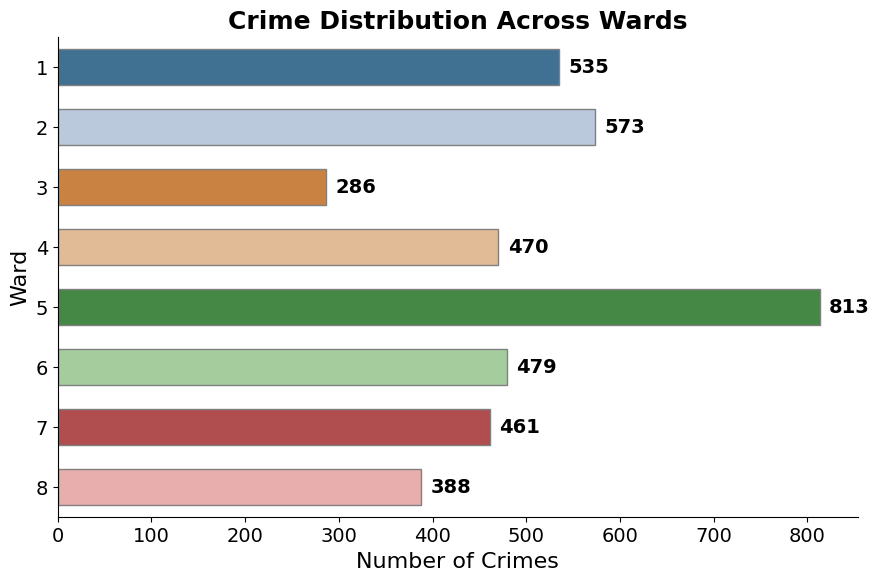

In [ ]:
# Count the number of cases in each WARD and sort from 1
ward_counts = data["WARD"].value_counts().sort_index()

# Warna sesuai dengan permintaan
ward_colors = {
    1: "#3274a1",
    2: "#b5c8e1",
    3: "#e1812c",
    4: "#eebb89",
    5: "#3a923a",
    6: "#9fd495",
    7: "#c03d3e",
    8: "#f2a5a3"
}

# List the colors in WARD order from 1 to 8
colors = [ward_colors[ward] for ward in sorted(ward_counts.index)]

ward_counts = ward_counts.reindex(range(1, 9), fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=ward_counts.values,
    y=ward_counts.index.astype(str), 
    palette=colors,
    edgecolor="grey",
    width=0.6,
    orient='h'  
)

# Formatting
plt.title("Crime Distribution Across Wards", fontsize=18, fontweight="bold")
plt.xlabel("Number of Crimes", fontsize=16)
plt.ylabel("Ward", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for index, value in enumerate(ward_counts.values):
    ax.text(value + 10, index, str(value), va='center', fontsize=14, fontweight='bold', color="black")

plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)

# Show plot
plt.show()


In [26]:
ward_count_total

,count
WARD,
1,535
2,573
3,286
4,470
5,813
6,479
7,461
8,388


In [30]:
print(ward_count_total)

      count
WARD       
1       535
2       573
3       286
4       470
5       813
6       479
7       461
8       388


In [68]:
data.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,OBJECTID,DATE(REPORT),DATE(START),DATE(END),TIME(REPORT),TIME(START),TIME(END),Hour,Time Category,TIME(DURATION)
0,400046.41,137753.65,25017503,2025-02-05 19:50:58+00:00,DAY,OTHERS,MOTOR VEHICLE THEFT,400 - 499 BLOCK OF MORSE STREET NE,400046.41,137753.65,...,685784661,2025-02-05,2025-02-05,2025-02-05,0 days 19:50:58,0 days 19:22:00,0 days 19:25:00,19,Evening,0 days 00:03:00
1,397868.68,141140.38,25013087,2025-01-28 12:08:29+00:00,DAY,OTHERS,THEFT/OTHER,3800 - 3899 BLOCK OF GEORGIA AVENUE NW,397868.68,141140.38,...,685784675,2025-01-28,2025-01-28,2025-01-28,0 days 12:08:29,0 days 11:06:00,0 days 11:07:00,11,Morning,0 days 00:01:00
2,399489.48,137372.65,25012701,2025-01-27 17:28:06+00:00,DAY,OTHERS,ROBBERY,1100 - 1150 BLOCK OF 1ST STREET NE,399489.48,137372.65,...,685784796,2025-01-27,2025-01-27,2025-01-27,0 days 17:28:06,0 days 15:00:00,0 days 15:20:00,15,Afternoon,0 days 00:20:00
3,401498.97,138734.57,25008887,2025-01-19 19:59:51+00:00,DAY,OTHERS,THEFT/OTHER,1500 - 1599 BLOCK OF NEW YORK AVENUE NE,401498.97,138734.57,...,685784829,2025-01-19,2025-01-19,2025-01-19,0 days 19:59:51,0 days 19:22:00,0 days 19:32:00,19,Evening,0 days 00:10:00
4,400212.85,137949.33,25011684,2025-01-25 15:45:47+00:00,DAY,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 5TH STREET NE,400212.85,137949.33,...,685784830,2025-01-25,2025-01-24,2025-01-24,0 days 15:45:47,0 days 00:00:00,0 days 03:30:00,0,Night,0 days 03:30:00


In [69]:
data['WARD'].unique()

array([5, 4, 6, 1, 8, 7, 2, 3])

C:\Users\LOQ\AppData\Local\Temp\ipykernel_4016\1136691625.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  offense_ward_counts = data.pivot_table(index="OFFENSE", columns="WARD", aggfunc="size", fill_value=0)


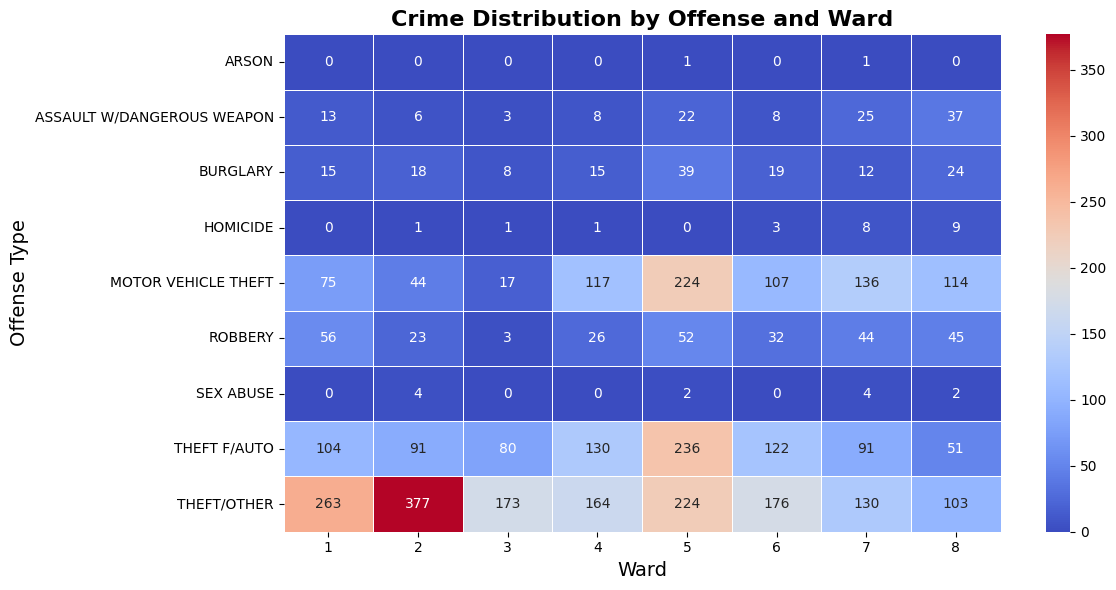

In [71]:
# Heatmap
# Convert WARD to categorical (if not already)
data["WARD"] = data["WARD"].astype(str)

# Create a pivot table to count offenses per ward
offense_ward_counts = data.pivot_table(index="OFFENSE", columns="WARD", aggfunc="size", fill_value=0)

# Define figure size
plt.figure(figsize=(12, 6))

# Create heatmap
sns.heatmap(offense_ward_counts, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)

# Title and labels
plt.title("Crime Distribution by Offense and Ward", fontsize=16, fontweight='bold')
plt.xlabel("Ward", fontsize=14)
plt.ylabel("Offense Type", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show plot
plt.tight_layout()
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_15664\1595959021.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_counts = data.groupby(['WARD', 'OFFENSE']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

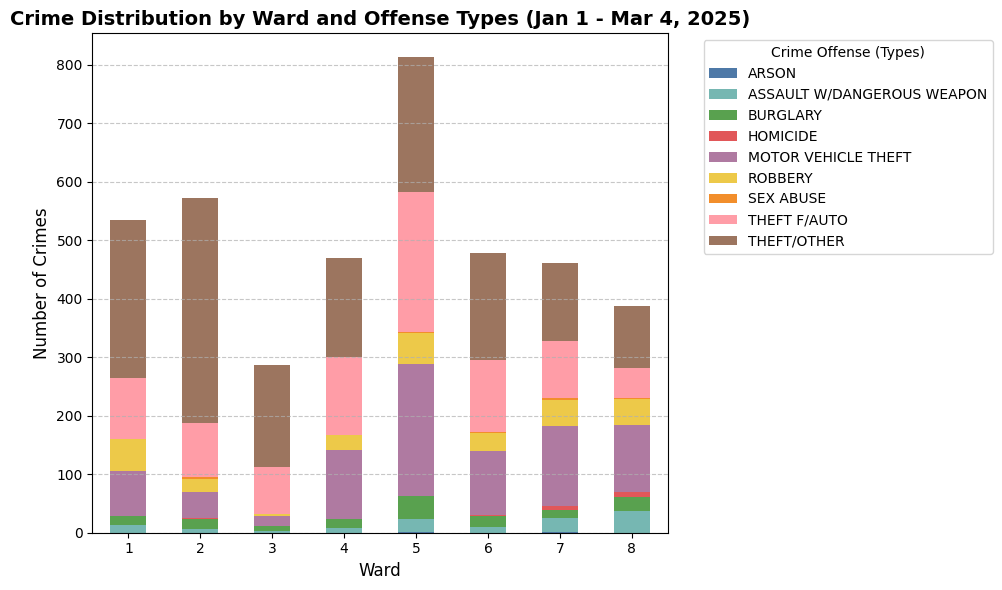

In [3]:
# Stacked bar chart
# Aggregate data
crime_counts = data.groupby(['WARD', 'OFFENSE']).size().unstack(fill_value=0)

# Define consistent colors
color_mapping = {
    "THEFT/OTHER": "#9c755f",
    "THEFT F/AUTO": "#ff9da7",
    "MOTOR VEHICLE THEFT": "#af7aa1",
    "ROBBERY": "#edc949",
    "BURGLARY": "#59a14f",
    "ASSAULT W/DANGEROUS WEAPON": "#76b7b2",
    "HOMICIDE": "#e15759",
    "SEX ABUSE": "#f28e2b",
    "ARSON": "#4e79a7"
}

# Ensure the color list follows the offense order
colors = [color_mapping[offense] for offense in crime_counts.columns if offense in color_mapping]

# Plot Stacked Bar Chart
plt.figure(figsize=(12, 6))
crime_counts.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Formatting
plt.title("Crime Distribution by Ward and Offense Types (Jan 1 - Mar 4, 2025)", fontsize=14, fontweight='bold')
plt.xlabel("Ward", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Crime Offense (Types)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_15664\2336311796.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_counts_detailed = data.groupby(['OFFENSE', 'WARD']).size().reset_index(name='COUNT')
C:\Users\LOQ\AppData\Local\Temp\ipykernel_15664\2336311796.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_crime_counts = crime_counts_detailed.groupby("OFFENSE")["COUNT"].sum().reset_index()


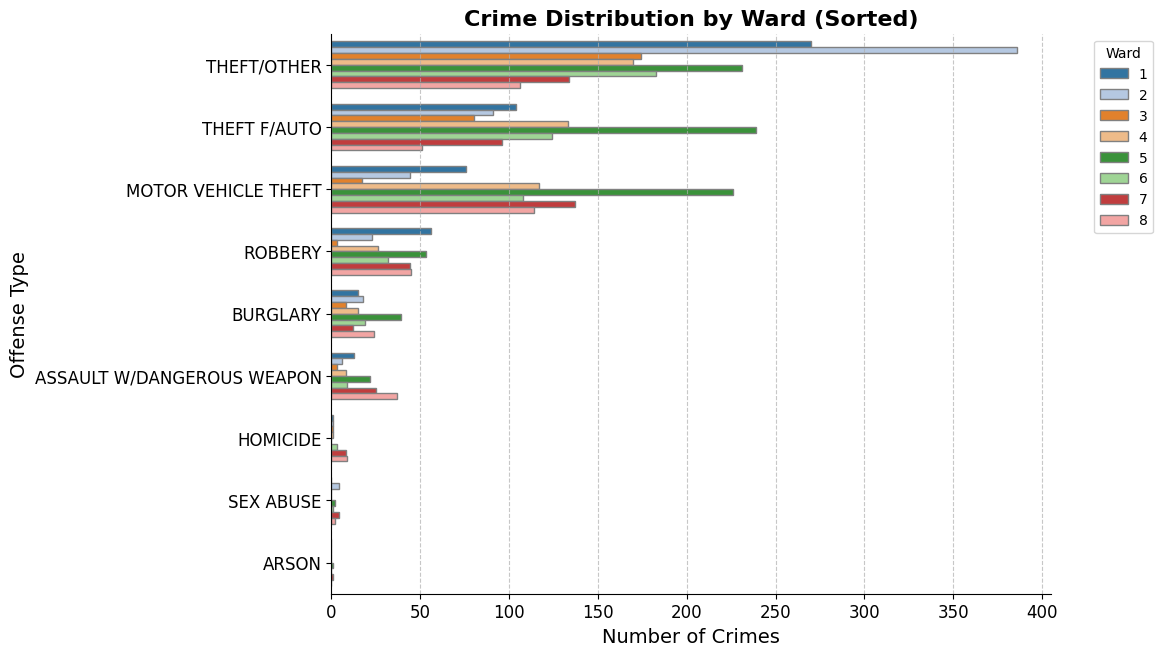

In [10]:
# Aggregate total number of crimes per offense and ward
crime_counts_detailed = data.groupby(['OFFENSE', 'WARD']).size().reset_index(name='COUNT')

# Sort by total number of crimes for all wards (from highest to lowest)
total_crime_counts = crime_counts_detailed.groupby("OFFENSE")["COUNT"].sum().reset_index()
total_crime_counts = total_crime_counts.sort_values(by="COUNT", ascending=False)
ordered_offenses = total_crime_counts["OFFENSE"].tolist()

# Make sure the OFFENSE category follows the correct order
crime_counts_detailed["OFFENSE"] = pd.Categorical(crime_counts_detailed["OFFENSE"], categories=ordered_offenses, ordered=True)

num_wards = data["WARD"].nunique()
ward_palette = sns.color_palette("tab20", n_colors=num_wards)  # Warna lebih tajam dan kontras tinggi

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=crime_counts_detailed, 
    y="OFFENSE", 
    x="COUNT", 
    hue="WARD", 
    palette=ward_palette,  
    dodge=True,  
    width=0.75,  
    linewidth=1,  
    edgecolor="grey"
)

# Formatting
plt.title("Crime Distribution by Ward (Sorted)", fontsize=16, fontweight='bold')
plt.xlabel("Number of Crimes", fontsize=14)
plt.ylabel("Offense Type", fontsize=14)
plt.legend(title="Ward", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='', alpha=0)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplots_adjust(left=0.25, right=0.85, top=0.9, bottom=0.1)

# Show plot
plt.show()


In [89]:
# Count the number of events per OFFENSE in each WARD
crime_counts = data.groupby(['WARD', 'OFFENSE']).size().unstack(fill_value=0)

# Determine the most frequent crime type in each WARD
most_common_crimes = crime_counts.idxmax(axis=1)
most_common_counts = crime_counts.max(axis=1)

# Display the result
for ward, crime in most_common_crimes.items():
    count = most_common_counts[ward]
    print(f"In WARD {ward}, the most frequent crime is '{crime}' with {count} reported cases.")


In WARD 1, the most frequent crime is 'THEFT/OTHER' with 263 reported cases.
In WARD 2, the most frequent crime is 'THEFT/OTHER' with 377 reported cases.
In WARD 3, the most frequent crime is 'THEFT/OTHER' with 173 reported cases.
In WARD 4, the most frequent crime is 'THEFT/OTHER' with 164 reported cases.
In WARD 5, the most frequent crime is 'THEFT F/AUTO' with 236 reported cases.
In WARD 6, the most frequent crime is 'THEFT/OTHER' with 176 reported cases.
In WARD 7, the most frequent crime is 'MOTOR VEHICLE THEFT' with 136 reported cases.
In WARD 8, the most frequent crime is 'MOTOR VEHICLE THEFT' with 114 reported cases.


C:\Users\LOQ\AppData\Local\Temp\ipykernel_4016\1116463665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_counts = data.groupby(['WARD', 'OFFENSE']).size().unstack(fill_value=0)
